# <span style="color:Purple"> Numerical Simulation Laboratory : Exercise 7 - Molecular Dynamics in NVT ensemble </span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

# Esercizio 7.1 - <span style="color:deeppink"> Autocorrelation </span>

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm , cauchy
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

k_b = 1.380649 * 10**(-23) #(J/K)
epsilon = 120 * k_b  #(joule)
sigma_const = 0.34 * 10**(-9) #(m)

In [2]:
p = np.loadtxt( "MonteCarlo_NVT/liquid/pressures.0" , dtype=float , usecols=(0) , unpack= True)
u = np.loadtxt( "MonteCarlo_NVT/liquid/energy.0" , dtype=float , usecols=(0) , unpack= True)
p_solid = np.loadtxt( "MonteCarlo_NVT/solid/pressures.0" , dtype=float , usecols=(0) , unpack= True)
u_solid = np.loadtxt( "MonteCarlo_NVT/solid/energy.0" , dtype=float , usecols=(0) , unpack= True)
p_gas = np.loadtxt( "MonteCarlo_NVT/gas/pressures.0" , dtype=float , usecols=(0) , unpack= True)
u_gas = np.loadtxt( "MonteCarlo_NVT/gas/energy.0" , dtype=float , usecols=(0) , unpack= True)

In [3]:
def autocorrelation ( press , t , t_max ) :
    
   # sum of products
    sum1 = 0
    for t_primo in range(t_max-t):
        sum1 = sum1 + press[t_primo]*press[t_primo+t]
    
    # sum in t'
    sum2 = 0
    for t_primo in range(t_max-t):
        sum2 = sum2 + press[t_primo]
        
    # sum in t'+t
    sum3 = 0
    for t_primo in range(t_max-t):
        sum3 = sum3 + press[t_primo+t]
     
    # normalization - sum of squares in t'
    sum4 = 0
    for t_primo in range(t_max):
        sum4 = sum4 + press[t_primo]**2
      
    # normalization - sum in t'
    sum5 = 0
    for t_primo in range(t_max):
        sum5 = sum5 + press[t_primo]
    
    num = 1./(t_max-t) * sum1 - (1./(t_max-t) * sum2) * (1./(t_max-t) * sum3)
        
    den = 1./t_max * sum4 - (1./t_max * sum5)**2
    
    return num / den

In [4]:
t = np.arange( 400 )
tmax = 400
autocorrelation_p_liq = np.zeros(tmax)
autocorrelation_e_liq = np.zeros(tmax)
autocorrelation_p_sol = np.zeros(tmax)
autocorrelation_e_sol = np.zeros(tmax)
autocorrelation_p_gas = np.zeros(tmax)
autocorrelation_e_gas = np.zeros(tmax)

In [5]:
for i in t :
    autocorrelation_p_liq[i] = autocorrelation ( p , i , tmax )
    autocorrelation_e_liq[i] = autocorrelation ( u , i , tmax )
    autocorrelation_p_sol[i] = autocorrelation ( p_solid , i , tmax )
    autocorrelation_e_sol[i] = autocorrelation ( u_solid , i , tmax )
    autocorrelation_p_gas[i] = autocorrelation ( p_gas , i , tmax )
    autocorrelation_e_gas[i] = autocorrelation ( u_gas , i , tmax )

### Liquid system

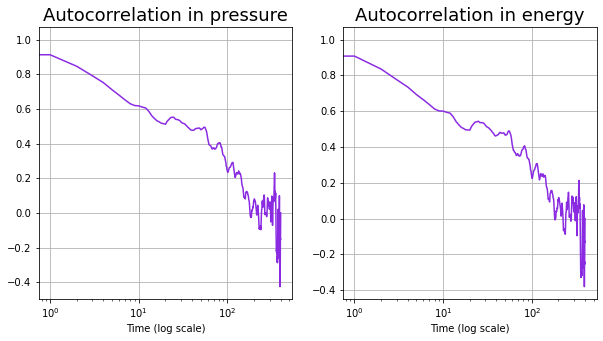

In [6]:
fig , ax = plt.subplots( 1 , 2 , figsize = (10,5) )
ax[0].plot( t , autocorrelation_p_liq , color= "blueviolet" )
ax[1].plot( t , autocorrelation_e_liq , color= "blueviolet" )
ax[0].set_title("Autocorrelation in pressure" , fontsize = 18)
ax[0].set_xscale("log")
ax[0].set_xlabel("Time (log scale)")
ax[1].set_title("Autocorrelation in energy" , fontsize = 18)
ax[1].set_xscale("log")
ax[1].set_xlabel("Time (log scale)")
ax[0].grid()
ax[1].grid()

### Gas system

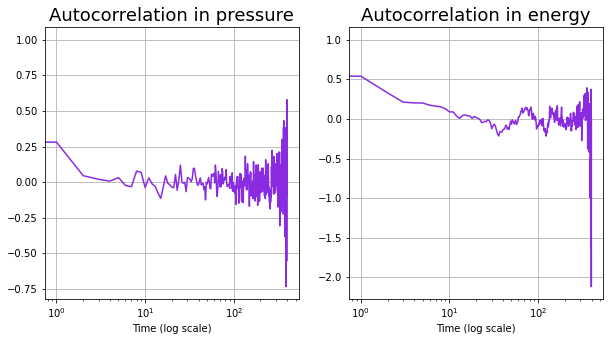

In [7]:
fig , ax = plt.subplots( 1 , 2 , figsize = (10,5) )
ax[0].plot( t , autocorrelation_p_gas , color= "blueviolet" )
ax[1].plot( t , autocorrelation_e_gas , color= "blueviolet" )
ax[0].set_title("Autocorrelation in pressure" , fontsize = 18)
ax[0].set_xscale("log")
ax[0].set_xlabel("Time (log scale)")
ax[1].set_title("Autocorrelation in energy" , fontsize = 18)
ax[1].set_xscale("log")
ax[1].set_xlabel("Time (log scale)")
ax[0].grid()
ax[1].grid()

### Solid system

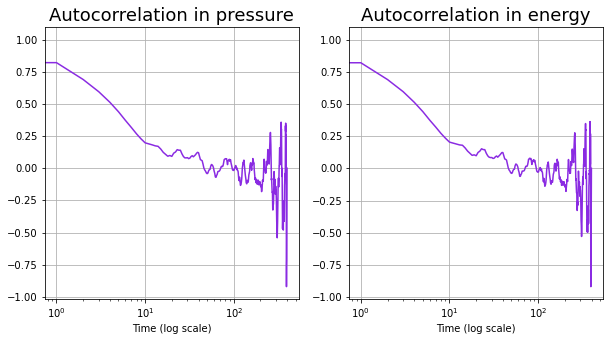

In [44]:
fig , ax = plt.subplots( 1 , 2 , figsize = (10,5) )
ax[0].plot( t , autocorrelation_p_sol , color= "blueviolet" )
ax[1].plot( t , autocorrelation_e_sol , color= "blueviolet" )
ax[0].set_title("Autocorrelation in pressure" , fontsize = 18)
ax[0].set_xscale("log")
ax[0].set_xlabel("Time (log scale)")
ax[1].set_title("Autocorrelation in energy" , fontsize = 18)
ax[1].set_xscale("log")
ax[1].set_xlabel("Time (log scale)")
ax[0].grid()
ax[1].grid()

    Il tempo di correlazione misura il tempo impiegato dal sistema per arrivare ad uno stato molto diverso da quello attuale. Come atteso, le autocorrelazioni in pressione ed energia plottate nei precedenti grafici sono significative per tempi brevi, mentre decadono esponenzialmente all'aumentare del tempo (si tenga a mente che il plot è in scala logaritmica). 
    Le correlazioni per il sistema gassoso decadono molto più rapidamente che negli altri casi. Questo accade perchè nello step Monte Carlo l'intervallo di campionamento della nuova posizione è molto più ampio, quindi è più facile per il sistema raggiungere nuove configurazioni. Per il gas la delta che individua l'intervallo di campionamento vale vale 2.5 (in unità di LJ), per il solido 0.12, mentre per il liquido 0.2. 
    In tutti e tre i casi dopo 100 step temporali la correlazione è persa. Ne teniamo contonto nel scegliere la dimensione dei blocchi.

# Statistical uncertainties

In [9]:
blocchi = np.array( (50000 , 10000 , 5000 , 2500 , 2000 , 1000 , 800 , 500 , 400 , 100) , dtype=int)
L = 5*10**5 / blocchi #contiene il numero di stime per blocco 

In [10]:
def error ( sum_prog, sum_prog2 , N):
    if(N==0): return 0 
    
    var = ( sum_prog2[N] - sum_prog[N]**2 )/N ;
    return var**(1/2) ;


def sigma( p  , blocks ):
    L = int(500000/blocks)
    sum_prog = np.zeros(blocks)
    sum_prog_2 = np.zeros(blocks)
    errors = np.zeros(blocks)
    
    
    for i in range(blocks):
        s = 0. 
        for j in range(L):
            s += p[j + i * L] ;
        
        s /= L ;

        if (i==0):
            sum_prog[i] = s ;
            sum_prog_2[i] = s**2;
    

        else :
            sum_prog[i] = sum_prog[i-1] + s ;
            sum_prog_2[i] = sum_prog_2[i-1] + s**2 ;
      
    for i in range(blocks):
        sum_prog[i] /= (i+1) ;
        sum_prog_2[i] /= (i+1) ;
        errors[i] = error( sum_prog , sum_prog_2 , i );

    return errors[-1]

In [11]:
errors_p_liq = np.zeros(len(blocchi))
errors_e_liq = np.zeros(len(blocchi))
errors_p_sol = np.zeros(len(blocchi))
errors_e_sol = np.zeros(len(blocchi))
errors_p_gas = np.zeros(len(blocchi))
errors_e_gas = np.zeros(len(blocchi))


for i in range( len(blocchi) ):
    errors_p_liq[i] = sigma( p  , blocchi[i] )
    errors_e_liq[i] = sigma( u  , blocchi[i] )
    errors_p_sol[i] = sigma( p_solid  , blocchi[i] )
    errors_e_sol[i] = sigma( u_solid , blocchi[i] )
    errors_p_gas[i] = sigma( p_gas  , blocchi[i] )
    errors_e_gas[i] = sigma( u_gas  , blocchi[i] )
    

### Liquid

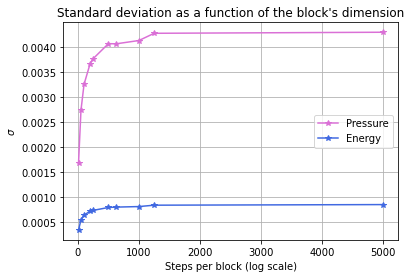

In [47]:
plt.plot( L , errors_p_liq , marker= "*", label = "Pressure" , color = "orchid")
plt.plot( L , errors_e_liq , marker= "*" , label = "Energy" , color= "royalblue")
plt.xlabel('Steps per block (log scale)')
plt.ylabel(r'$ \sigma $')
plt.title("Standard deviation as a function of the block's dimension")
plt.legend(loc="best")
#plt.xscale("log")
plt.grid()

### Solid

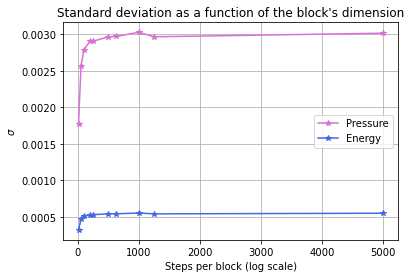

In [46]:
plt.plot( L , errors_p_sol , marker= "*" , label = "Pressure" , color = "orchid")
plt.plot( L , errors_e_sol , marker= "*" , label = "Energy" , color= "royalblue")
plt.xlabel('Steps per block (log scale)')
plt.ylabel(r'$ \sigma $')
plt.title("Standard deviation as a function of the block's dimension")
plt.legend(loc="best")
#plt.xscale("log")
plt.grid()

### Gas

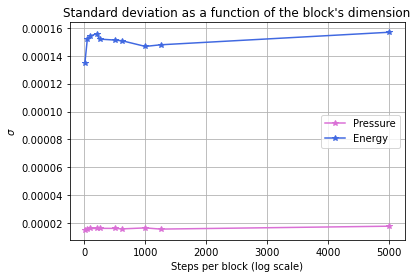

In [48]:
plt.plot( L , errors_p_gas , marker= "*" , label="Pressure" , color = "orchid" )
plt.plot( L , errors_e_gas , marker= "*" , label = "Energy" ,  color= "royalblue")
plt.xlabel('Steps per block (log scale)')
plt.ylabel(r'$ \sigma $')
plt.title("Standard deviation as a function of the block's dimension")
plt.legend(loc="best")
#plt.xscale("log")
plt.grid()

    L'incertezza statistica cresce in funzione della dimensione dei blocchi. L'andamento è del tutto compatibile con quello atteso, infatti in blocchi troppo piccoli le misure sono molto correlate e l'incertezza statistica viene  sottostimata. Al crescere della dimensione dei blocchi invece l'incertezza aumenta fino a saturare. Quando questo accade le misure sono ormai scorrelate, quindi la dimensione del blocco è stata scelta in modo corretto. Si capisce anche che è inutile fare blocchi troppo grandi, in tutti e tre i sistemi le incertezze risultano già sature con 1000 step per blocco.

# Esercizio 7.2 - <span style="color:deeppink"> $ g(r) $ pair distribution function  </span>

In [49]:
gr_liq , errors_liq = np.loadtxt( "MonteCarlo_NVT/liquid/output.gave.0" , dtype=float , delimiter=',' ,  usecols=(0 , 1) , unpack= True)
gr_sol , errors_sol = np.loadtxt( "MonteCarlo_NVT/solid/output.gave.0" , dtype=float , delimiter=',' , usecols=(0 , 1) , unpack= True)
gr_gas , errors_gas = np.loadtxt( "MonteCarlo_NVT/gas/output.gave.0" , dtype=float , delimiter=',' , usecols=(0 , 1) , unpack= True)

In [50]:
binsize_liq = (108/0.8)**(1/3) /200.
bins_liq = np.arange( start = binsize_liq/2. , stop =  binsize_liq*(0.5 + 100), step = binsize_liq  )
binsize_sol = (108/1.1)**(1/3) /200.
bins_sol = np.arange( start = binsize_sol/2. , stop =  binsize_sol*(0.5 + 100), step = binsize_sol  )
binsize_gas = (108/0.05)**(1/3) /200.
bins_gas = np.linspace( start = binsize_gas/2. , stop =  binsize_gas*(0.5 + 100), num = 100) 

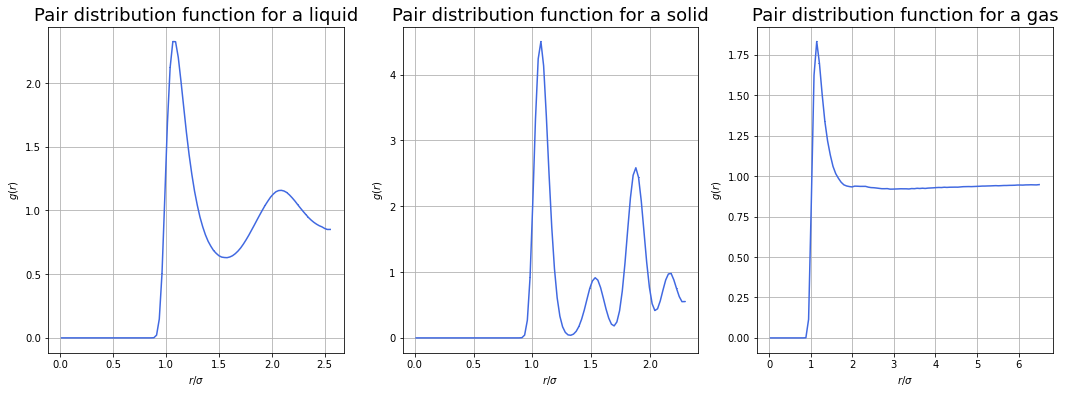

In [51]:
fig , [ax1 , ax2 , ax3] = plt.subplots( 1 , 3 , figsize = (18 , 6))
ax1.errorbar( bins_liq , gr_liq , yerr = errors_liq , color = "royalblue")
ax1.set_xlabel(r'$r/ \sigma $')
ax1.set_ylabel(r'$g(r)$')
ax1.set_title('Pair distribution function for a liquid' , fontsize=18 )
ax2.errorbar( bins_sol , gr_sol , yerr = errors_sol , color = "royalblue")
ax2.set_xlabel(r'$r/ \sigma $')
ax2.set_ylabel(r'$g(r)$')
ax2.set_title('Pair distribution function for a solid' , fontsize=18)
ax3.errorbar( bins_gas , gr_gas , yerr = errors_gas , color = "royalblue")
ax3.set_xlabel(r'$r/ \sigma $')
ax3.set_ylabel(r'$g(r)$')
ax3.set_title('Pair distribution function for a gas' , fontsize=18)
ax1.grid()
ax2.grid()
ax3.grid()

    Le funzioni di distrubuzioni a coppie raffigurate nei precedenti grafici sono state ottenute muovendo le 108 particelle secondo un algoritmo di metropolis. In totale ho eseguito 10^5 step, che sono stati divisi in 50 blocchi. Ogni blocco contiene 2000 step, che per le precedenti misure di autocorrelazione sono più che sufficienti perchè non ci sia correlazione nella misura. È importante ricordare che in ogni step l'algoritmo prova a spostare tutte le 108 particelle, e la mossa proposta viene accettata se l'energia del sistema diminuisce, altrimenti la probabilità di accettazione è data da una distribuzione di Boltzmann, come previsto dall'algoritmo di Metropolis.
    
    Nei solidi mi 

# Esercizio 7.3 - <span style="color:deeppink"> $g(r)$ in NVE ensemble  </span>

In [18]:
g_solid, error_g_solid =  np.loadtxt( "MolecularDynamics_NVE/solid/ave_gofr.dat" , dtype=float , delimiter=',' , usecols=(0 , 1) , unpack= True)
g_liquid, error_g_liquid =  np.loadtxt( "MolecularDynamics_NVE/liquid/ave_gofr.dat" , dtype=float , delimiter=',' , usecols=(0 , 1) , unpack= True)
g_gas, error_g_gas =  np.loadtxt( "MolecularDynamics_NVE/gas/ave_gofr.dat" , dtype=float , delimiter=',' , usecols=(0 , 1) , unpack= True)

Text(0.5, 1.0, 'Pair distribution function for a gas')

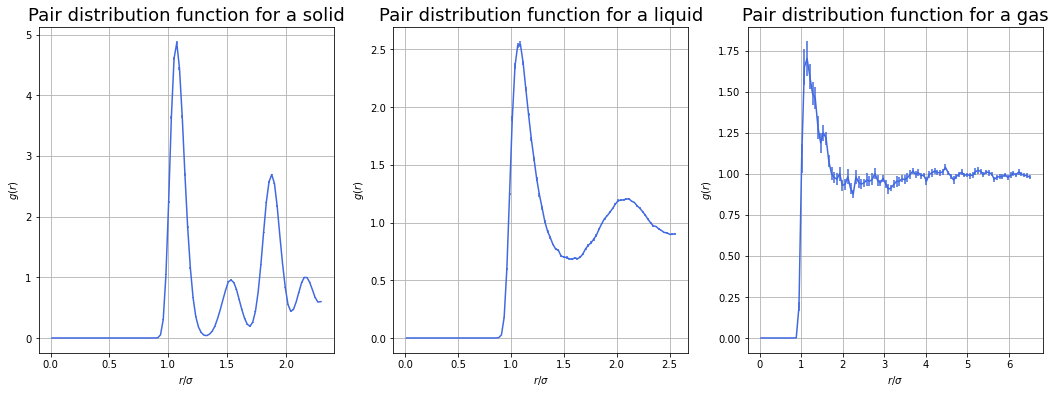

In [53]:
fig , [ax1 , ax2 , ax3] = plt.subplots( 1 , 3 , figsize = (18 , 6))
#solid
ax1.errorbar( bins_sol , g_solid , yerr = error_g_solid , color = "royalblue")
ax1.set_xlabel(r'$r/ \sigma $')
ax1.set_ylabel(r'$g(r)$')
ax1.grid(True)
ax1.set_title('Pair distribution function for a solid' , fontsize=18 )
#liquid
ax2.errorbar( bins_liq , g_liquid , yerr = error_g_liquid , color = "royalblue")
ax2.set_xlabel(r'$r/ \sigma $')
ax2.set_ylabel(r'$g(r)$')
ax2.grid(True)
ax2.set_title('Pair distribution function for a liquid' , fontsize=18 )
#gas
ax3.errorbar( bins_gas , g_gas , yerr = error_g_gas , color = "royalblue")
ax3.set_xlabel(r'$r/ \sigma $')
ax3.set_ylabel(r'$g(r)$')
ax3.grid(True)
ax3.set_title('Pair distribution function for a gas' , fontsize=18 )

    Il calcolo delle funzioni di distribuzione a coppie nel codice di dinamica molecolare, è stato eseguito sui sistemi equilibrati. L'equilibrazione è stata fatta in maniera analoga all'esercitazione 4: 
    
        1. Per la fase solida sono state eseguite 8 ripartenze a distanza di 500 step temporali
        2. Il sistema liquido è stato equilibrato eseguendo 10 ripartenze a distanza di 500 step
        3. La fase gassosa invece è stata equilibrata con 20 ripartenze distanti 500 step

    Dopo di che la misura delle proprietà viene eseguita ogni 10 step di una simulazione da 20000 step totali. Il data blocking su queste misure è stato eseguito suddividendole in 20 blocchi. È evidente la compatibilità di queste misure con quelle fatte nell'ensemble canonico, successivamente sarà effettuato un confronto diretto. 
    
    Le tre curve trovate sono plausibili, infatti:
     1. Il solido ha una struttura reticolare ordinata, infatti la funzione di distribuzione a coppie mostra il picco dei primi vicini e altri picchi regolarmente spaziati che rappresentano i vicini di ordine crescente.
     2. Il liquido ha una struttura più disordinata, rimane ben evidente il picco dei primi vicini mentre i successivi picchi sono meno intensi.
     3. Il gas invece, che presenta una fase disordinata, mostra comunque un picco di primi vicini, ma la distribuzione successivamente di appiattisce a dimostrazione della distribuzione uniforme nello spazio del gas.

# Esercizio 7.4 - <span style="color:deeppink"> <span style="color:deeppink"> Simulations for Argon in NVT ensemble </span> 

### Solid Phase

In [37]:
energy_sol , err_ene_sol = np.genfromtxt( "MonteCarlo_NVT/solid/output.epot.0" , dtype=float , delimiter=',' , usecols=(2,3) , unpack= True)
pres_sol , err_pres_sol = np.genfromtxt( "MonteCarlo_NVT/solid/output.pres.0" , dtype=float , delimiter=',' , usecols=(2,3) , unpack= True) 

#SI UNITS
energy_sol *= epsilon 
err_ene_sol *= epsilon
pres_sol *= epsilon / (sigma_const**3)
err_pres_sol *= epsilon / (sigma_const**3)
bins_sol *= sigma_const

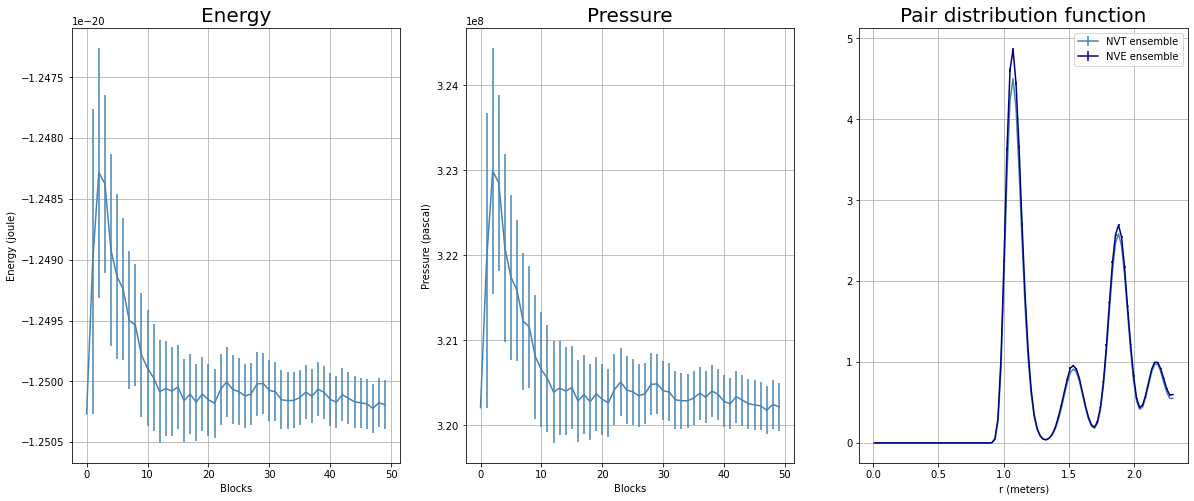

In [54]:
fig , ax = plt.subplots(1, 3 , figsize=(20,8)) 
#Potential energy
ax[0].errorbar( np.arange(len(energy_sol)) , energy_sol  , yerr= err_ene_sol, color = "steelblue" )
ax[0].set_title("Energy" , fontsize=20)
ax[0].set_xlabel( "Blocks" )
ax[0].set_ylabel( "Energy (joule)" )
ax[0].grid()

#Pressures
ax[1].errorbar( np.arange(len(pres_sol)) , pres_sol  , yerr= err_pres_sol , color = "steelblue" )
ax[1].set_title("Pressure" , fontsize=20)
ax[1].set_xlabel( "Blocks" )
ax[1].set_ylabel( "Pressure (pascal)" )
ax[1].grid()

#pair distribution function
ax[2].errorbar( bins_sol , gr_sol , yerr = errors_sol , color= "steelblue" , label = "NVT ensemble")
ax[2].errorbar( bins_sol , g_solid , yerr = error_g_solid , color="navy" , label = "NVE ensemble")
ax[2].set_title("Pair distribution function" , fontsize=20)
ax[2].set_xlabel( "r (meters)" )
ax[2].legend(loc="best")
ax[2].grid()

La fase solida dell'argon è stata simulata a T = 96 K, $\rho = 4.32 * 10^{-29}$ e con cut-off $r = 7.48* 10^{-10}$. La simulazione prevede un totale di $10^5$ step, suddivisi in 50 blocchi di lunghezza 2000. Energia e pressione risultano simili a quelle ottenute nell'ensemble microcanonico dell'esercizio 4, a verifica del fatto che gli ensemble sono alla fine equivalenti. Anche le funzioni di distribuzione a coppie trovano buon accordo nei due ensemble termodinamici.

### Liquid Phase

In [59]:
energy_liq , err_ene_liq = np.loadtxt( "MonteCarlo_NVT/liquid/output.epot.0" , dtype=float , delimiter=',' , usecols=(2,3) , unpack= True)
pres_liq , err_pres_liq = np.loadtxt( "MonteCarlo_NVT/liquid/output.pres.0" , dtype=float , delimiter=',' , usecols=(2,3) , unpack= True)

#SI UNITS
energy_liq *= epsilon 
err_ene_liq *= epsilon
pres_liq *= epsilon / (sigma_const**3)
err_pres_liq *= epsilon / (sigma_const**3)
bins_liq *= sigma_const

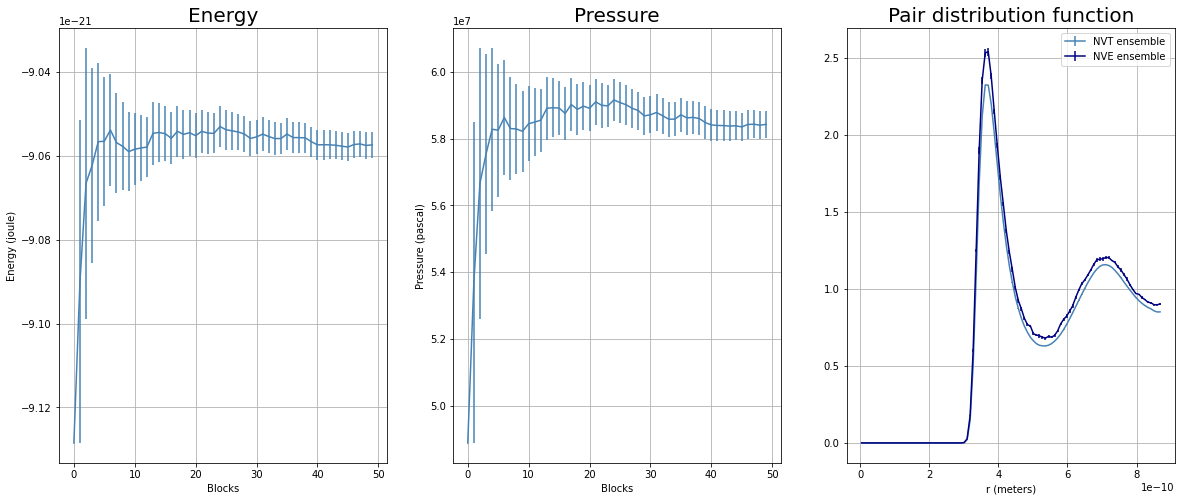

In [60]:
fig , ax = plt.subplots(1, 3 , figsize=(20,8)) 
#Energy
ax[0].errorbar( np.arange(len(energy_liq)) , energy_liq  , yerr= err_ene_liq , color = "steelblue")
ax[0].set_title("Energy" , fontsize=20)
ax[0].set_xlabel( "Blocks" )
ax[0].set_ylabel( "Energy (joule)" )
ax[0].grid()

#Pressure
ax[1].errorbar( np.arange(len(pres_liq)) , pres_liq  , yerr= err_pres_liq , color = "steelblue")
ax[1].set_title("Pressure" , fontsize=20)
ax[1].set_xlabel( "Blocks" )
ax[1].set_ylabel( "Pressure (pascal)" )
ax[1].grid()

#g(r)
ax[2].errorbar( bins_liq , gr_liq , yerr = errors_liq , color = "steelblue" , label = "NVT ensemble")
ax[2].errorbar( bins_liq , g_liquid , yerr = error_g_liquid , color="navy" , label = "NVE ensemble")
ax[2].set_title("Pair distribution function" , fontsize=20)
ax[2].set_xlabel( "r (meters)" )
ax[2].legend(loc="best")
ax[2].grid()

La fase liquida dell'argon è stata simulata a T = 132 K, $\rho = 3.14 * 10^{-29}$ e con cut-off $r = 8.5 * 10^{-10}$. Energia e pressione risultano simili a quelle ottenute nell'ensemble microcanonico dell'esercizio 4, a verifica del fatto che gli ensemble sono alla fine equivalenti. Anche le funzioni di distribuzione a coppie trovano buon accordo nei due ensemble termodinamici.

### Gas phase

In [57]:
energy_gas, err_ene_gas = np.loadtxt( "MonteCarlo_NVT/gas/output.epot.0" , dtype=float , delimiter=',' , usecols=(2,3) , unpack= True)
pres_gas , err_pres_gas = np.loadtxt( "MonteCarlo_NVT/gas/output.pres.0" , dtype=float , delimiter=',' , usecols=(2,3) , unpack= True)

#SI UNITS
energy_gas *= epsilon 
err_ene_gas *= epsilon
pres_gas *= epsilon / (sigma_const**3)
err_pres_gas *= epsilon / (sigma_const**3)
bins_gas *= sigma_const

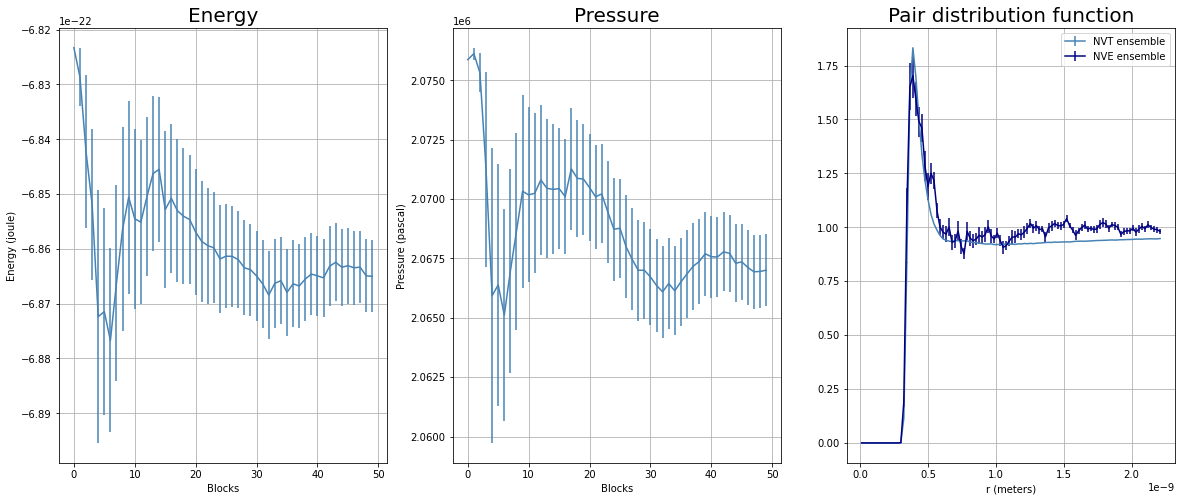

In [58]:
fig , ax = plt.subplots(1, 3 , figsize=(20,8)) 
#energy
ax[0].errorbar( np.arange(len(energy_gas)) , energy_gas  , yerr= err_ene_gas , color = "steelblue")
ax[0].set_title("Energy" , fontsize=20)
ax[0].set_xlabel( "Blocks" )
ax[0].set_ylabel( "Energy (joule)" )
ax[0].grid()

#pressure
ax[1].errorbar( np.arange(len(pres_gas)) , pres_gas  , yerr= err_pres_gas , color = "steelblue")
ax[1].set_title("Pressure" , fontsize=20)
ax[1].set_xlabel( "Blocks" )
ax[1].set_ylabel( "Pressure (pascal)" )
ax[1].grid()

#g(r)
ax[2].errorbar( bins_gas , gr_gas , yerr = errors_gas , color = "steelblue" , label ="NVT ensemble")
ax[2].errorbar( bins_gas , g_gas , yerr = error_g_gas , color="navy" , label = "NVE ensemble" )
ax[2].set_title("Pair distribution function" , fontsize=20)
ax[2].set_xlabel( "r (meters)" )
ax[2].legend(loc="best")
ax[2].grid()

La fase gassosa dell'argon è stata simulata a T = 144 K, $\rho = 1.96 * 10^{-30}$ e con cut-off $r = 1.7 * 10^{-9}$. Energia e pressione risultano simili a quelle ottenute nell'ensemble microcanonico dell'esercizio 4, a verifica del fatto che gli ensemble sono alla fine equivalenti. Anche le funzioni di distribuzione a coppie trovano buon accordo nei due ensemble termodinamici.

### Final comments

Le simulazioni Monte Carlo nell'emsemble canonico sono state eseguite con un totale di $10^5$ step, suddivisi in 50 blocchi da 2000 step ciascuno- Questi valori sono stati scelti tenendo presente i risultati della prima parte di questo notebook, in cui abbiamo calcolato la lunghezza dei blocchi necessaria per eliminare le correlazioni.

I risultati della pressione sono consistenti con la fisica del sistema e compatibili con i valori ottenuti nel notebook 4, dove li abbiamo calcolati nell'ensemble microcanonico. La pressione in un solido è quella più intensa, il caso intermedio è quello di un liquido e infine la pressione è minore per i gas.

Anche le energie potenziali assumono valori plausibili: l'energia risulta più intensa per il solido, che è il sistema più fortemente interagente. Il potenziale minore è calcolato nel caso del gas, che effettivamente pè il sistema che presenta le minori interazioni.

Il confronto tra le funzioni di distribuzione radiali mostrano un buon accordo tra i due algoritmi, anche se con alcune differenze. In particolare l'algoritmo di Verlet porta ad un maggiore errore sui dati. Questo accade perchè l'algoritmo di Verlet è più instabile, nel senso che fatica a mantenere la temperatura di simulazione e quindi non può essere eseguito con un numero di mosse comparabili a quelle compiute nell'algoritmo monte carlo, perchè l'errore di discretizzazione dato dall'integrazione delle equazioni del moto si propaga troppo velocemente. Nonostante il numero inferiore di step, l'accordo tra le funzioni prodotte è buono.

### Conversion from Lennard-Jones units to SI units

Le unità di Lennard Jones sono convenienti perchè adimensionali, il loro ordine di grandezza inoltre evita problemi di underflow, che possono verificarsi soprattutto nello stimare l'energia, che se misurata in joule ha ordine di grandezza $10^{-21}$. Nel caso dell'argon, l'unità di lunghezza $\sigma$ è 0.34 nm , l'unità di energia $ \frac{\epsilon} { k_{b}}$ è 120 K e l'unità di massa è $m = 39,948 $ amu. 

Per riconvertire da unità di Lennard Jones ad unità di misura del SI, bisogna: 
1. Moltiplicare le lunghezze per $\sigma$ : $ r = \sigma r^* $
2. Moltiplicare le temperature per $ \frac{\epsilon} { k_{b}} $ : $ T = T^* \frac{\epsilon} { k_{b}} $
3. Moltiplicare le energie per $\epsilon$: $ E = E^* \epsilon $